In [4]:
#Folders of Ground truth Masks and Original Image Samples
masks = r"C:\Users\oakle\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\segmentation\seg_dataset\verge_masks\SegmentationClass"
samples = r"C:\Users\oakle\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\segmentation\seg_dataset\gv_seg"

In [5]:
#get sample 1
import os
samp1 = os.path.join(samples,os.listdir(samples)[0])
print(samp1)

C:\Users\oakle\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\segmentation\seg_dataset\gv_seg\20220605231413_000097_Trim_frame2.jpg


In [7]:
import matplotlib.pyplot as plt
import skimage
imp = skimage.io.imread(samp1)
print(imp.shape)

(1080, 1920, 3)


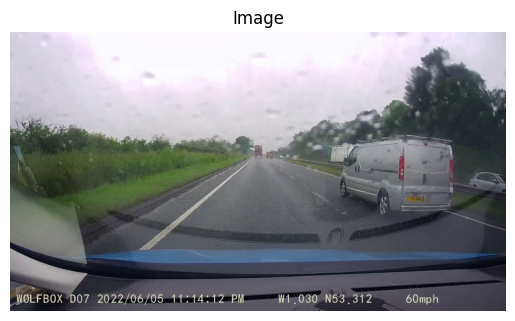

In [8]:
import cv2
import matplotlib.pyplot as plt
im = cv2.imread(samp1)
plt.title("Image")
plt.axis('off')
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

In [10]:
import os
import pandas as pd
#get seeds from litter locations
labelCSV = r"C:\Users\oakle\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\copy-paste\Training02.csv"

centx = []
centy = []

#annotations file
df_antt = pd.read_csv(labelCSV)

xmin = df_antt["xmin"].values
ymin = df_antt["ymin"].values
xmax = df_antt["xmax"].values
ymax = df_antt["ymax"].values
width = df_antt["width"].values #width and height of IMAGES
height = df_antt["height"].values

for i, name in enumerate(xmin):
    xcen = float((xmin[i] + xmax[i])) / 2 / width[i] #normalise bboxes for yolo according to image size (YOLO is in format <class> <x centroid> <y centroid> <bb width> <bb height>)
    ycen = float((ymin[i] + ymax[i])) / 2 / height[i]
    
    centx.append(xcen)
    centy.append(ycen)

#get normalised center points of litter

# files = os.listdir(labelDir)

# for i,f in enumerate(files):
#     f_path = os.path.join(labelDir,f)
#     with open(f_path, 'r') as content:
#         print(content.readlines())



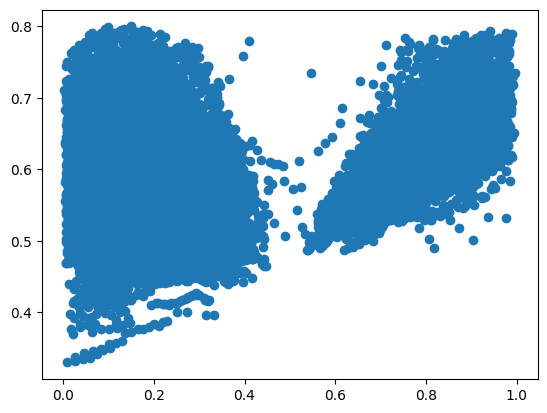

In [11]:
plt.scatter(centx,centy)

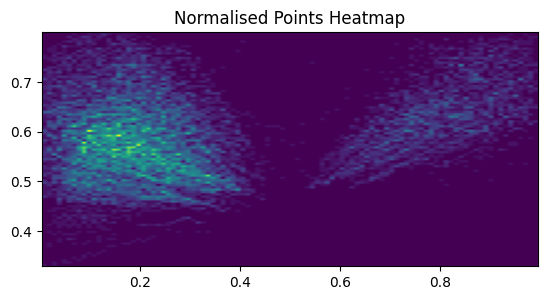

In [12]:
#plot normalised points
#plt.scatter(centx,centy)

import numpy as np
heatmap, xedges, yedges = np.histogram2d(centx, centy, bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.title("Normalised Points Heatmap")
plt.show()

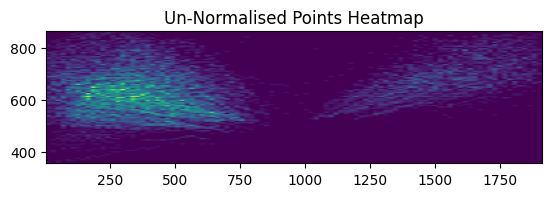

In [13]:
#Unnormalise points (1920x1080 Image)


newCentx = np.multiply(centx, 1920)
newCenty = np.multiply(centy, 1080)

heatmap, xedges, yedges = np.histogram2d(newCentx, newCenty, bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.title("Un-Normalised Points Heatmap")
plt.show()


0.14348958333333334


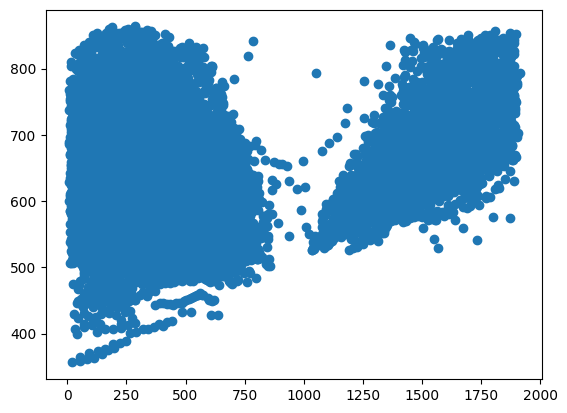

In [14]:
plt.scatter(newCentx,newCenty)
print(centx[1])

In [16]:
from sklearn.cluster import KMeans
import numpy as np
#unnormalised
points = [(centx[i], centy[i]) for i in range(0, len(centx))]

kmeans = KMeans(n_clusters=15, random_state=0).fit(points)


kCents = kmeans.cluster_centers_
x,y = zip(*kCents)

C:\Users\oakle\.conda\envs\copy-paste\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(1080, 1920, 3)


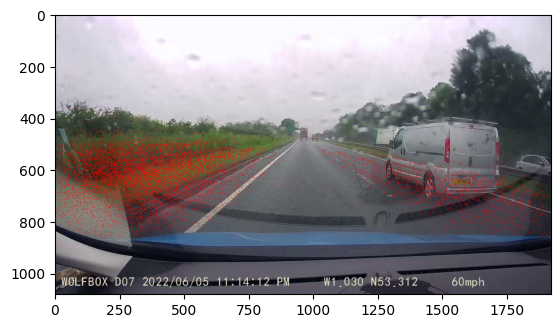

In [18]:
#plot all points
plotted_im = im.copy()
print(plotted_im.shape)

for i in range(0,len(centx)):
    cv2.circle(plotted_im, (int(centx[i]*1920),int(centy[i]*1080)), radius=1, color=(0, 0, 255), thickness=-1)
    
plt.imshow(cv2.cvtColor(plotted_im,cv2.COLOR_BGR2RGB))

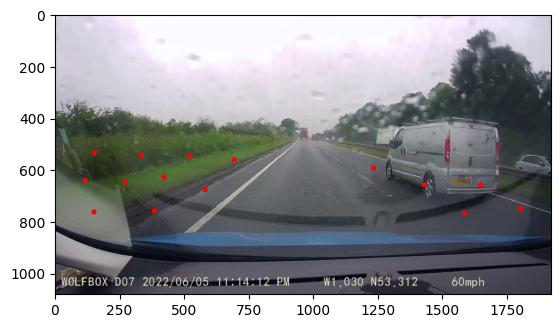

In [19]:
#plot clustered points
plotted_im = im.copy()
for i in range(0,len(x)):
    cv2.circle(plotted_im, (int(x[i]*1920),int(y[i]*1080)), radius=10, color=(0, 0, 255), thickness=-1)
    
plt.imshow(cv2.cvtColor(plotted_im,cv2.COLOR_BGR2RGB))

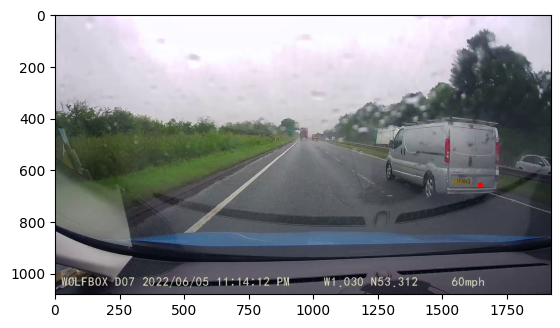

In [33]:
#plot a clustered point
plotted_im = im.copy()

cv2.circle(plotted_im, (int(x[1]*1920),int(y[1]*1080)), radius=10, color=(0, 0, 255), thickness=-1)
    
plt.imshow(cv2.cvtColor(plotted_im,cv2.COLOR_BGR2RGB))

In [21]:
print(plotted_im.shape)

(1080, 1920, 3)


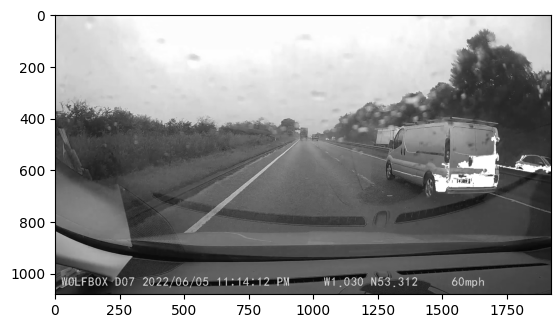

In [43]:
from skimage.segmentation import flood, flood_fill
filled = flood_fill(cv2.cvtColor(im, cv2.COLOR_RGB2GRAY),(int(y[1]*1080),int(x[1]*1920)),255,tolerance=15)
plt.imshow(cv2.cvtColor(filled,cv2.COLOR_BGR2RGB))

In [27]:
print(kCents)

[[0.21939418 0.5831299 ]
 [0.85611648 0.61057997]
 [0.14124084 0.60010077]
 [0.36055577 0.52064299]
 [0.64081696 0.55077072]
 [0.07836575 0.70710373]
 [0.07966996 0.49579702]
 [0.3022034  0.62711891]
 [0.2719483  0.50667181]
 [0.93649025 0.69502664]
 [0.82455412 0.71074638]
 [0.74282156 0.60993302]
 [0.20007378 0.70313633]
 [0.17376594 0.50517309]
 [0.06083282 0.59430929]]


In [28]:
print(newCentx)

[ 321.   275.5  487.  ... 1795.5 1863.5  475.5]


(1080, 1920)


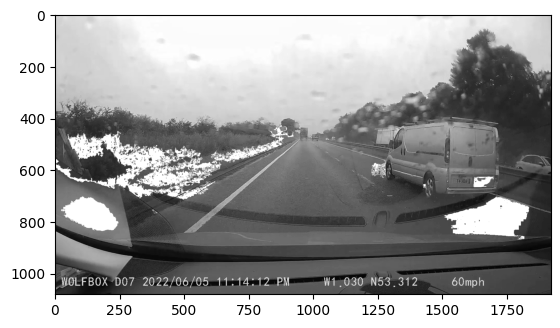

In [50]:
#Filling based on kmeans
new = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#new = cv2.rotate(recur_filled,cv2.ROTATE_90_COUNTERCLOCKWISE) # why need rotating?
print(new.shape)
#print(recur_filled.shape)

for i in range(0,len(x)):

#     try:
    new = new.copy()
    new = flood_fill(new,(int(y[i]*1080),int(x[i]*1920)),255,tolerance=5)
#     except:
#         print(int(x[i]),int(y[i]))


#rotBack = cv2.rotate(new,cv2.ROTATE_90_CLOCKWISE)
plt.imshow(new,cmap = "gray")


#Print different tolerances
#Two main parameters... tolerance and value of K
#Clean up, do for all images, find sky?

#close/dilate best result...
#blend hsv segment with point segment
#put points into segment-anything model
#learn which points fit in best - k-means points to ground truth....?
#flood fill based on hsv

#For copy-paste...
#1.Try with verge only
#2. Try with prob. map only
#3. Try random
#4. Try different litter-Blending strategies

C:\Users\oakle\.conda\envs\copy-paste\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\oakle\.conda\envs\copy-paste\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\oakle\.conda\envs\copy-paste\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\oakle\.conda\envs\copy-paste\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

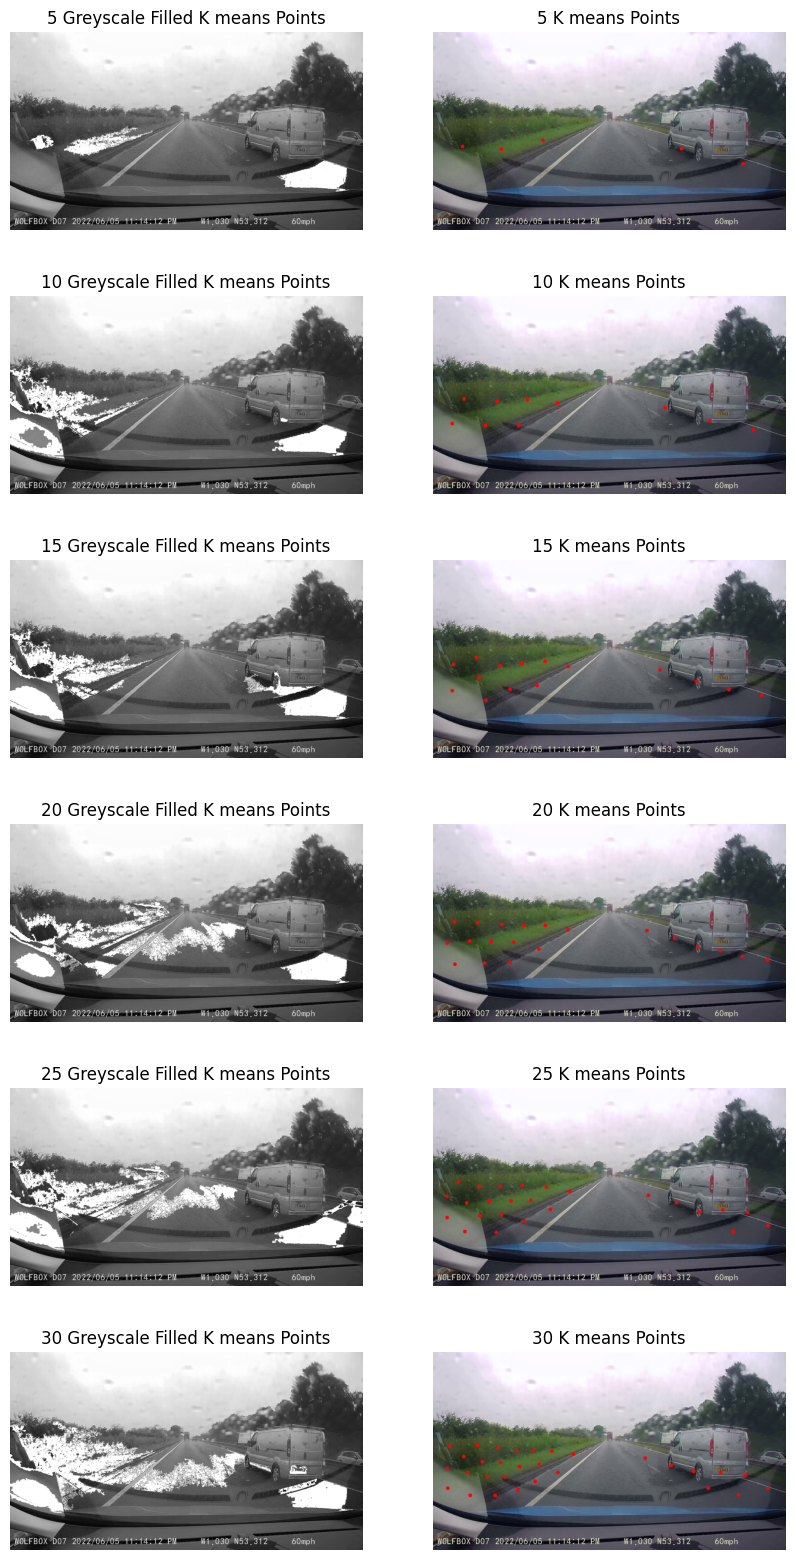

In [72]:
#Different K means values points
plt.figure(figsize=(10,20))

from sklearn.cluster import KMeans
import numpy as np
#unnormalised

def kmeans_fill(ks,tolerance):
    plt_counter = 1
    #get height & width of verge
    vh = im.shape[0]; vw = im.shape[1]
    for i, k in enumerate(ks): 
        points = [(centx[j]*vw, centy[j]*vh) for j in range(0, len(centx))]
        
        
        kmeans = KMeans(n_clusters=k, random_state=0).fit(points)


        kCents = kmeans.cluster_centers_
        x,y = zip(*kCents)
        
        #Filling based on kmeans
        new = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        #new = cv2.rotate(recur_filled,cv2.ROTATE_90_COUNTERCLOCKWISE) # why need rotating? - Due to openCV reading?

        for j in range(0,len(x)):
            new = new.copy()
            new = flood_fill(new,(int(y[j]),int(x[j])),255,tolerance=tolerance)
        
        

        #rotBack = cv2.rotate(new,cv2.ROTATE_90_CLOCKWISE)
        
        
        plt.subplot(len(ks),2,plt_counter)
        plt.axis("off")
        plt.title(f"{k} Greyscale Filled K means Points")
        plt.imshow(new,cmap = "gray")
        
        plt_counter += 1
        #plot clustered points
        plotted_im = im.copy()
        for j in range(0,len(x)):
            cv2.circle(plotted_im, (int(x[j]),int(y[j])), radius=10, color=(0, 0, 255), thickness=-1)
            #print(int(x[i]*vw),int(y[i]*vh))


        plt.subplot(len(ks),2,plt_counter)
        plt.axis("off")
        plt.title(f"{k} K means Points")
        plt.imshow(cv2.cvtColor(plotted_im,cv2.COLOR_BGR2RGB))
        plt_counter += 1
        
kmeans_fill([5,10,15,20,25,30],7) #k's to test followed by fill tolerance
#most accurate seems to be low k value, higher tolerance

C:\Users\oakle\.conda\envs\copy-paste\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\oakle\.conda\envs\copy-paste\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\oakle\.conda\envs\copy-paste\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\oakle\.conda\envs\copy-paste\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

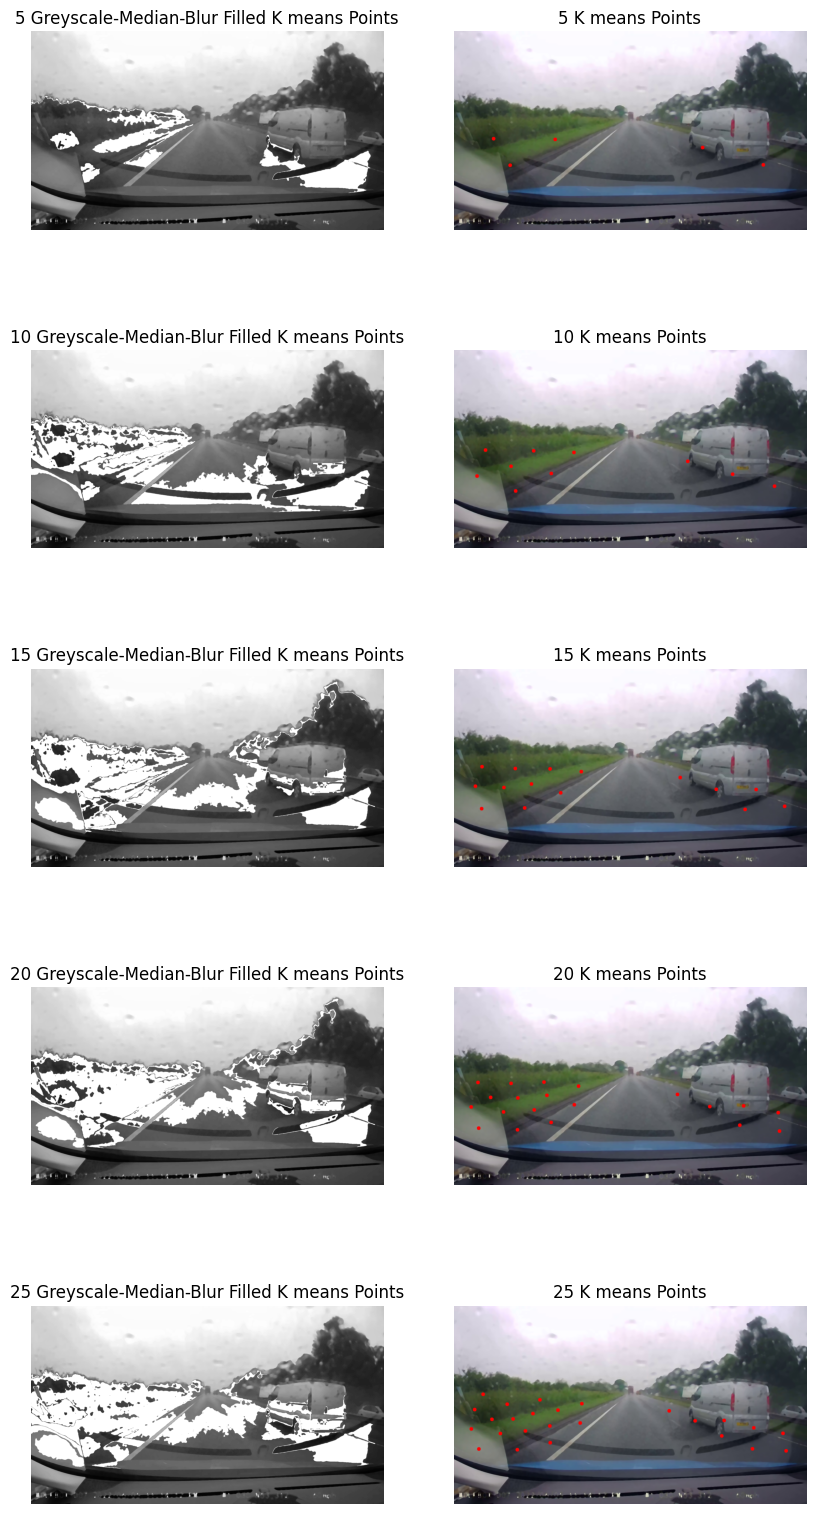

In [73]:
#with median filter

#Different K means values points
plt.figure(figsize=(10,20))

from sklearn.cluster import KMeans
import numpy as np
#unnormalised

def kmeans_fill(ks,tolerance,blur_val):
    plt_counter = 1
    for i, k in enumerate(ks): 
        points = [(centx[j], centy[j]) for j in range(0, len(centx))]

        kmeans = KMeans(n_clusters=k, random_state=0).fit(points)


        kCents = kmeans.cluster_centers_
        x,y = zip(*kCents)
        
        #Filling based on kmeans
        new = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        new = cv2.medianBlur(new, blur_val)
        #new = cv2.rotate(recur_filled,cv2.ROTATE_90_COUNTERCLOCKWISE) # why need rotating? - Due to openCV reading?

        for j in range(0,len(x)):
            
            new = flood_fill(new,(int(y[j]*1080),int(x[j]*1920)),255,tolerance=tolerance)
        
        

        #rotBack = cv2.rotate(new,cv2.ROTATE_90_CLOCKWISE)
        
        
        plt.subplot(len(ks),2,plt_counter)
        plt.axis("off")
        plt.title(f"{k} Greyscale-Median-Blur Filled K means Points")
        plt.imshow(new,cmap = "gray")
        
        plt_counter += 1
        #plot clustered points
        plotted_im = im.copy()
        plotted_im = cv2.medianBlur(plotted_im, blur_val)
        for j in range(0,len(x)):
            cv2.circle(plotted_im, (int(x[j]*1920),int(y[j]*1080)), radius=10, color=(0, 0, 255), thickness=-1)


        plt.subplot(len(ks),2,plt_counter)
        plt.axis("off")
        plt.title(f"{k} K means Points")
        plt.imshow(cv2.cvtColor(plotted_im,cv2.COLOR_BGR2RGB))
        plt_counter += 1
        
kmeans_fill([5,10,15,20,25],7,11) #k's to test followed by fill tolerance & blur level(odd number)

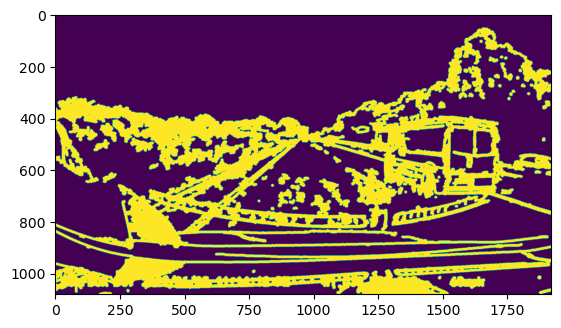

In [21]:
from skimage import filters
from skimage import feature
recur_filled = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#recur_filled = cv2.medianBlur(recur_filled, 11)
#recur_filled = filters.sobel(recur_filled)
recur_filled = cv2.Canny(recur_filled,10,200)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
recur_filled = cv2.dilate(recur_filled, kernel)
plt.imshow(recur_filled)

C:\Users\oakle\.conda\envs\copy-paste\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\oakle\.conda\envs\copy-paste\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\oakle\.conda\envs\copy-paste\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\oakle\.conda\envs\copy-paste\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

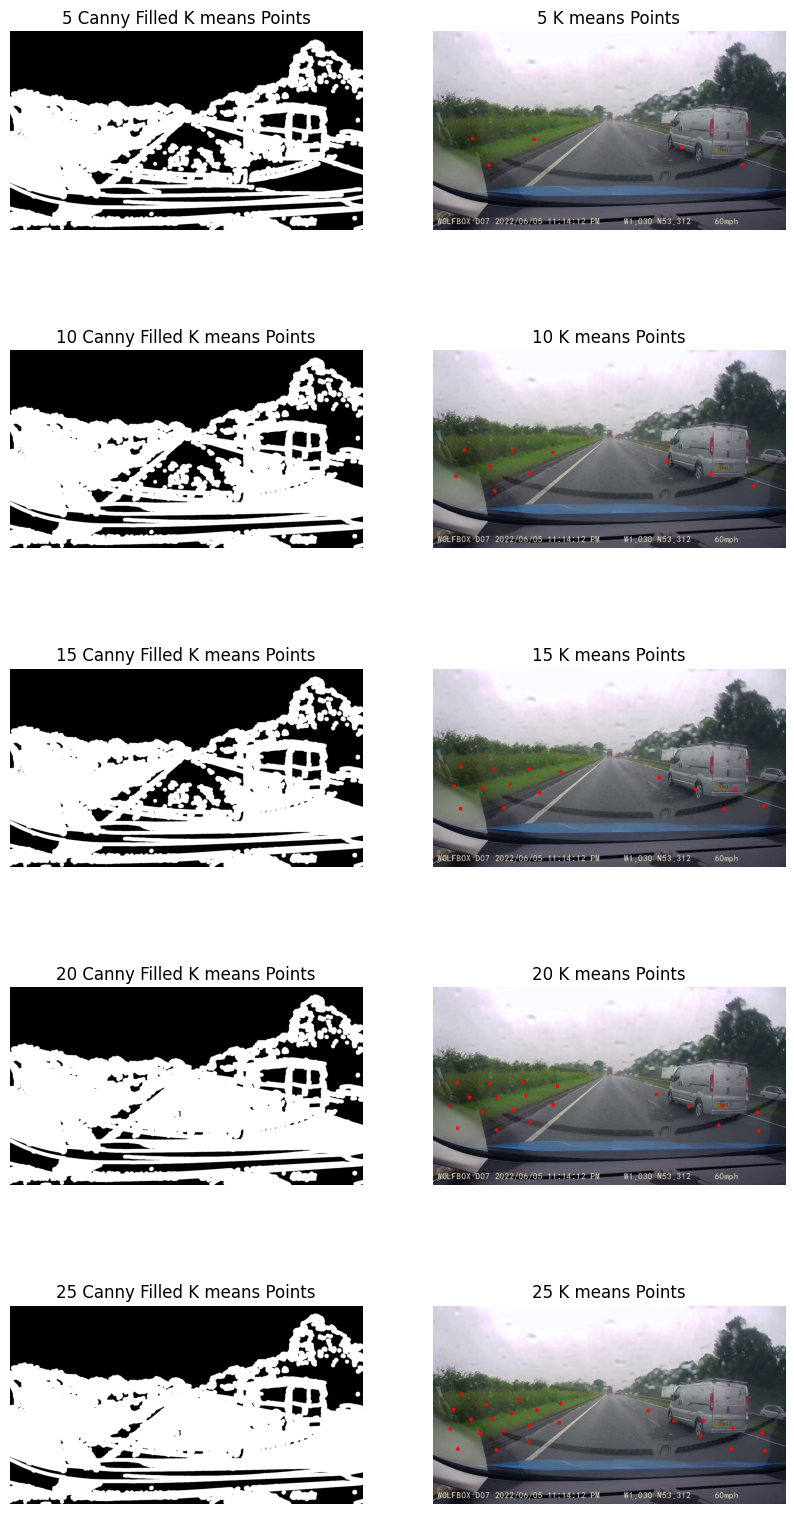

In [75]:
#with canny filter
from skimage import filters
#Different K means values points
plt.figure(figsize=(10,20))

from sklearn.cluster import KMeans
import numpy as np
#unnormalised

def kmeans_fill(ks,tolerance):
    plt_counter = 1
    for i, k in enumerate(ks): 
        points = [(centx[j], centy[j]) for j in range(0, len(centx))]

        kmeans = KMeans(n_clusters=k, random_state=0).fit(points)


        kCents = kmeans.cluster_centers_
        x,y = zip(*kCents)

        #Filling based on kmeans
        new = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        new = cv2.Canny(new,10,200)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(21,21))
        new = cv2.dilate(new, kernel)
        #new = cv2.rotate(recur_filled,cv2.ROTATE_90_COUNTERCLOCKWISE) # why need rotating? - Due to openCV reading?

        for j in range(0,len(x)):
            new = new.copy()
            new = flood_fill(new,(int(y[j]*1080),int(x[j]*1920)),255,tolerance=tolerance)
        
        

        #rotBack = cv2.rotate(new,cv2.ROTATE_90_CLOCKWISE)
        
        
        plt.subplot(len(ks),2,plt_counter)
        plt.axis("off")
        plt.title(f"{k} Canny Filled K means Points")
        plt.imshow(new,cmap = "gray")
        
        plt_counter += 1
        #plot clustered points
        plotted_im = im.copy()
        for j in range(0,len(x)):
            cv2.circle(plotted_im, (int(x[j]*1920),int(y[j]*1080)), radius=10, color=(0, 0, 255), thickness=-1)


        plt.subplot(len(ks),2,plt_counter)
        plt.axis("off")
        plt.title(f"{k} K means Points")
        plt.imshow(cv2.cvtColor(plotted_im,cv2.COLOR_BGR2RGB))
        plt_counter += 1
        
kmeans_fill([5,10,15,20,25],0.03) #k's to test followed by fill tolerance

C:\Users\oakle\.conda\envs\copy-paste\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


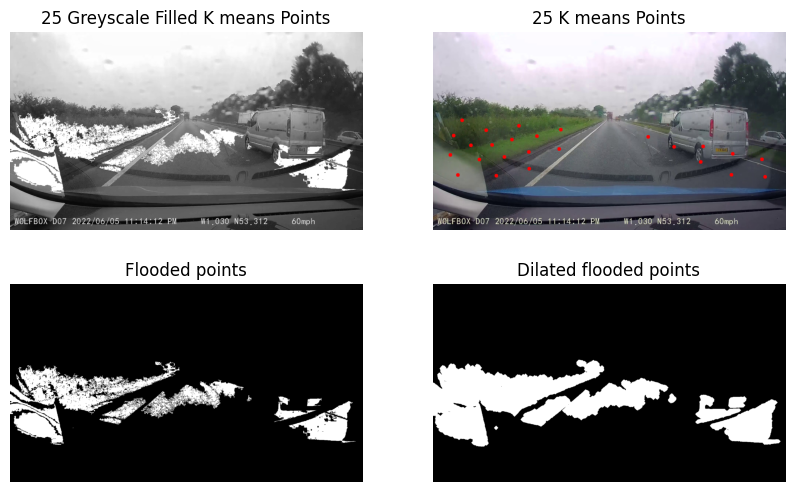

In [76]:
#Create better mask from best result
from skimage import morphology
#(25-K, 7 tolerance)
plt.figure(figsize=(10,6))

#get all litter points as tuple
points = [(centx[j], centy[j]) for j in range(0, len(centx))]

#perform k-means to reduce 
kmeans = KMeans(n_clusters=25, random_state=0).fit(points)


kCents = kmeans.cluster_centers_
x,y = zip(*kCents) #disconnect points from tuple


#convert image to greyscale
recur_filled = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#Rotate so that the read image size matches the points (makes no sense)
#rot = cv2.rotate(recur_filled,cv2.ROTATE_90_COUNTERCLOCKWISE) # why need rotating? - Due to openCV reading?

#create placeholder blank verges image
verges = np.zeros(new.shape)

#flood region at every point
for j in range(0,len(x)):
    recur_filled = recur_filled.copy()
    recur_filled = flood_fill(recur_filled,(int(y[j]*1080),int(x[j]*1920)),255,tolerance=7) #Just for Visualising flooding
    f = flood(recur_filled,(int(y[j]*1080),int(x[j]*1920)),tolerance=7) # add 260 (not in image pixel amount)
    verges += f #add flooded region to verges

#rotate back image and verges image
#rotBack = cv2.rotate(new,cv2.ROTATE_90_CLOCKWISE)
#verges = cv2.rotate(verges,cv2.ROTATE_90_CLOCKWISE)
verges[verges != 0] = 1 #normalise verges image [Binarise] (pixels may add due to flood additions)


plt.subplot(2,2,1)
plt.axis("off")
plt.title("25 Greyscale Filled K means Points")
plt.imshow(recur_filled,cmap = "gray")


#plot clustered points
plotted_im = im.copy()
for j in range(0,len(x)):
    cv2.circle(plotted_im, (int(x[j]*1920),int(y[j]*1080)), radius=10, color=(0, 0, 255), thickness=-1)


plt.subplot(2,2,2)
plt.axis("off")
plt.title("25 K means Points")
plt.imshow(cv2.cvtColor(plotted_im,cv2.COLOR_BGR2RGB))

plt.subplot(2,2,3)
plt.axis("off")
plt.title("Flooded points")
plt.imshow(verges, cmap = "gray")


#####Now do morph structuring element each side - specific '<' '>' -shaped kernels?

plt.subplot(2,2,4)

kernel = morphology.disk(1)

img_dilation = cv2.dilate(verges, kernel, iterations=10)

plt.title("Dilated flooded points")
plt.axis("off")
plt.imshow(img_dilation, cmap = "gray")

In [88]:
#Now test for all Images (Then go back to other project and dilate instead of close)

#takes x and y centers from entire dataset
def reduce_points(centx,centy):
    points = [(centx[j], centy[j]) for j in range(0, len(centx))]

    #perform k-means to reduce 
    kmeans = KMeans(n_clusters=25, random_state=0).fit(points)


    kCents = kmeans.cluster_centers_
    x,y = zip(*kCents) #disconnect points from tuple
    
    return x,y

def flood_point_segment(bgr_image, kmpx,kmp_y, tolerance = 7):
    ##get all litter points as tuple
    
    #convert image to greyscale
    recur_filled = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)
    im_shape = recur_filled.shape
    #Rotate so that the read image size matches the points (makes no sense)
    #rot = cv2.rotate(recur_filled,cv2.ROTATE_90_COUNTERCLOCKWISE) # why need rotating? - Due to openCV reading?

    #create placeholder blank verges image
    verges = np.zeros(im_shape)

    #flood region at every point
    for j in range(0,len(kmpx)):
        recur_filled = recur_filled.copy()
        
        
        x1=int(kmpx[j]*im_shape[1])
        y1=int(kmp_y[j]*im_shape[0])
        
        fl = flood(recur_filled,(y1,x1),tolerance=tolerance) # add 260 (not in image pixel amount)
        verges += fl #add flooded region to verges

    #rotate back verges image
    #verges = cv2.rotate(verges,cv2.ROTATE_90_CLOCKWISE)
    verges[verges != 0] = 1 #normalise verges image [Binarise] (pixels may add due to flood additions)


    #####Now do morph structuring element each side - specific '<' '>' -shaped kernels?


    kernel = morphology.disk(1)

    img_dilation = cv2.dilate(verges, kernel, iterations=10)

    
    return img_dilation

def evaluate_segment(seg,gt,prnt = False):
    seg = np.asarray(seg).astype(bool)
    gt = np.asarray(gt).astype(bool)
    intersection = np.logical_and(seg, gt)
    union = np.logical_or(seg, gt)
    
    #DICE
    dice = 2. * np.sum(intersection) / (np.sum(seg) + np.sum(gt))

    #IOU

    iou_score = np.sum(intersection) / np.sum(union)
    if prnt == True:
        print('IoU similarity score is {}'.format(iou_score))
        print('Dice similarity score is {}'.format(dice))
    return dice, iou_score

def format_gt(gt_mask_im):
    gt_mask = cv2.cvtColor(gt_mask_im, cv2.COLOR_BGR2GRAY)
    (thresh, gt_bw) = cv2.threshold(gt_mask, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)#convert mask to grayscale
    return gt_bw

C:\Users\oakle\.conda\envs\copy-paste\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


IoU similarity score is 0.3565087448509099
Dice similarity score is 0.5256269024496304


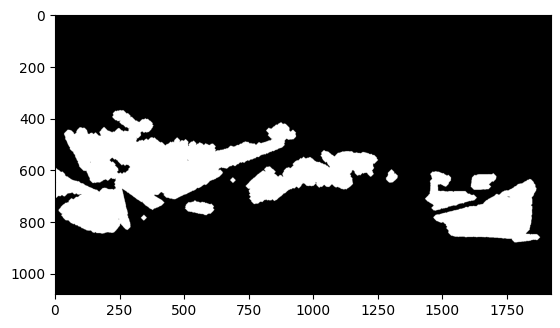

In [89]:
#Test Functions
x,y = reduce_points(centx,centy)

im = cv2.imread(samp1)
test = flood_point_segment(im,x,y,5)
plt.imshow(test, cmap = "gray")

gt_mask_p = os.path.join(masks,os.listdir(masks)[0])
gt_mask = cv2.imread(gt_mask_p)
m = format_gt(gt_mask)

(dice, iou_score) = evaluate_segment(test,m, True)

In [90]:
from tqdm import tqdm
#Perform over all dataset
samp_fs = os.listdir(samples)
mask_fs = os.listdir(masks)

ious = []
dices = []

x,y = reduce_points(centx,centy)

for i in tqdm(range(0,len(samp_fs))):
    im_p = os.path.join(samples,samp_fs[i])
    gt_name = samp_fs[i].replace(".jpg",".png")

    gt_p = os.path.join(masks,gt_name)
    
    im = cv2.imread(im_p)
    
    #format full image

    flooded = flood_point_segment(im,x,y)
    
    #format mask
    gt_mask = cv2.imread(gt_p)
    m = format_gt(gt_mask)

    (dice, iou_score) = evaluate_segment(flooded,m)
    

    ious.append(iou_score)
    dices.append(dice)
    
print("Average IOU: ", np.mean(ious))
print("Average Dice: ", np.mean(dices))

C:\Users\oakle\.conda\envs\copy-paste\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:07<00:00,  5.35it/s]

Average IOU:  0.24991554630345297
Average Dice:  0.3882313281935163


<BarContainer object of 40 artists>

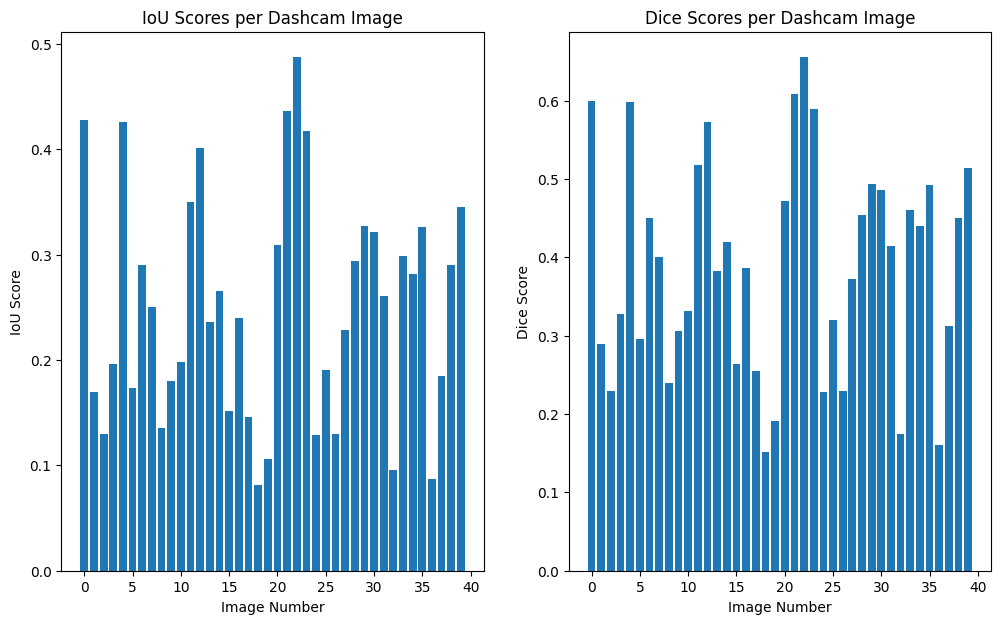

In [91]:
plt.figure(figsize=(12, 7))
h = range(0,len(ious))
plt.subplot(1,2,1)
plt.title("IoU Scores per Dashcam Image")
plt.xlabel("Image Number")
plt.ylabel("IoU Score")
plt.bar(h,ious)

plt.subplot(1,2,2)
plt.title("Dice Scores per Dashcam Image")
plt.xlabel("Image Number")
plt.ylabel("Dice Score")
plt.bar(h,dices)

C:\Users\oakle\.conda\envs\copy-paste\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


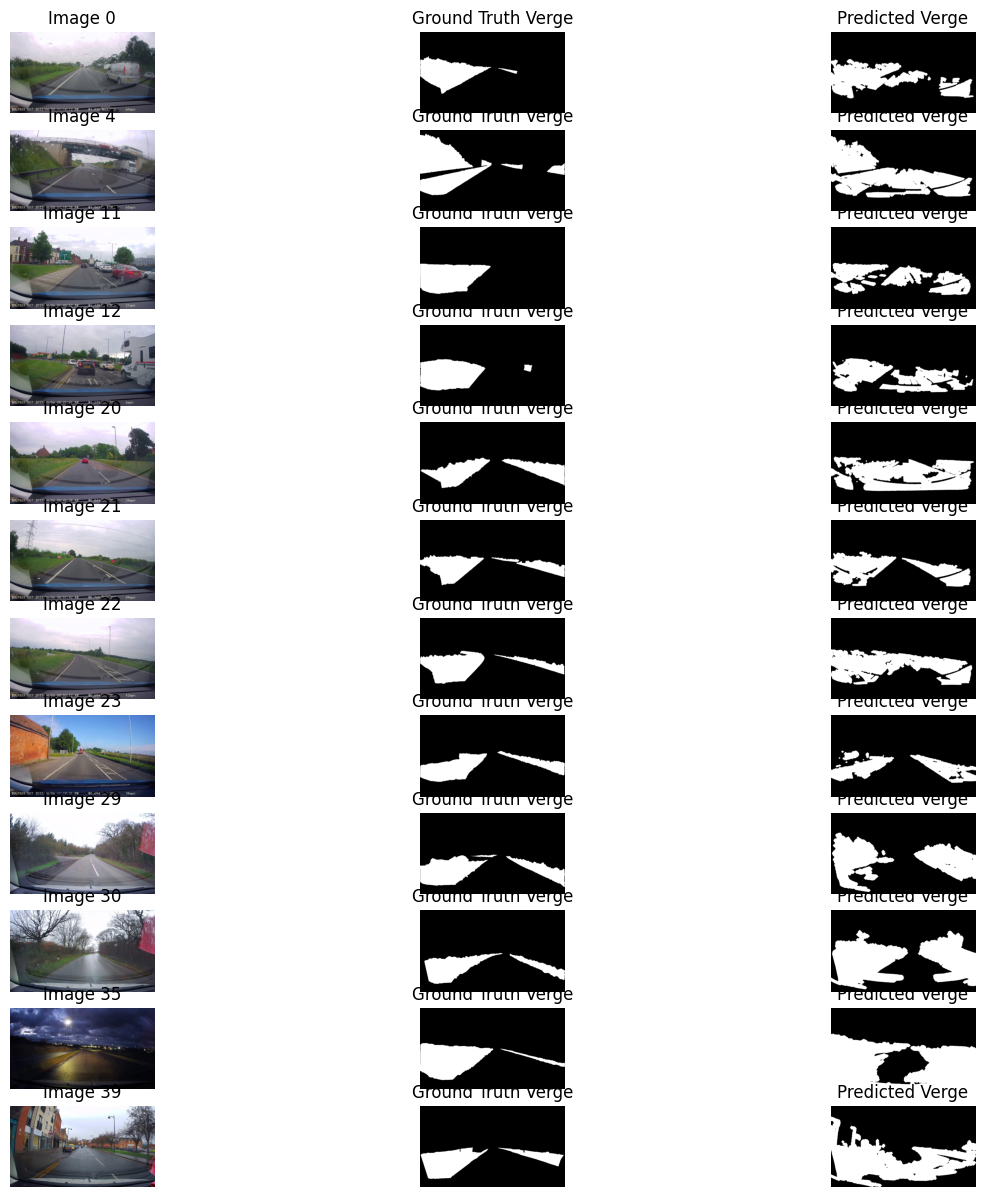

In [92]:
#Show Images where IoU is over 0.3 (Best)
plt.figure(figsize=(15, 15))

x,y = reduce_points(centx,centy)

n_dices = []
indexs = []

#find indexes
for i, u in enumerate(ious):
    if u > 0.3:
        indexs.append(i)

pic_indexer = 1

#Print their ground truth masks and relevant images
for i in range(0,len(indexs)):
    im_p = os.path.join(samples,samp_fs[indexs[i]])
    gt_name = samp_fs[indexs[i]].replace(".jpg",".png")
    gt_p = os.path.join(masks,gt_name)
    
    im = cv2.imread(im_p)
    #format full image

    flooded = flood_point_segment(im,x,y)
    
    #format mask
    gt_mask = cv2.imread(gt_p)
    m = format_gt(gt_mask)
    
    plt.subplot(len(indexs),3,pic_indexer)
    plt.axis('off')
    plt.title(f"Image {indexs[i]}")
    plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
    
    pic_indexer+=1
    
    plt.subplot(len(indexs),3,pic_indexer)
    plt.axis('off')
    plt.title("Ground Truth Verge")
    plt.imshow(m,cmap = "gray")
    
    pic_indexer+=1
    
    plt.subplot(len(indexs),3,pic_indexer)
    plt.axis('off')
    plt.title("Predicted Verge")
    plt.imshow(flooded,cmap = "gray")
    
    pic_indexer+=1

C:\Users\oakle\.conda\envs\copy-paste\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


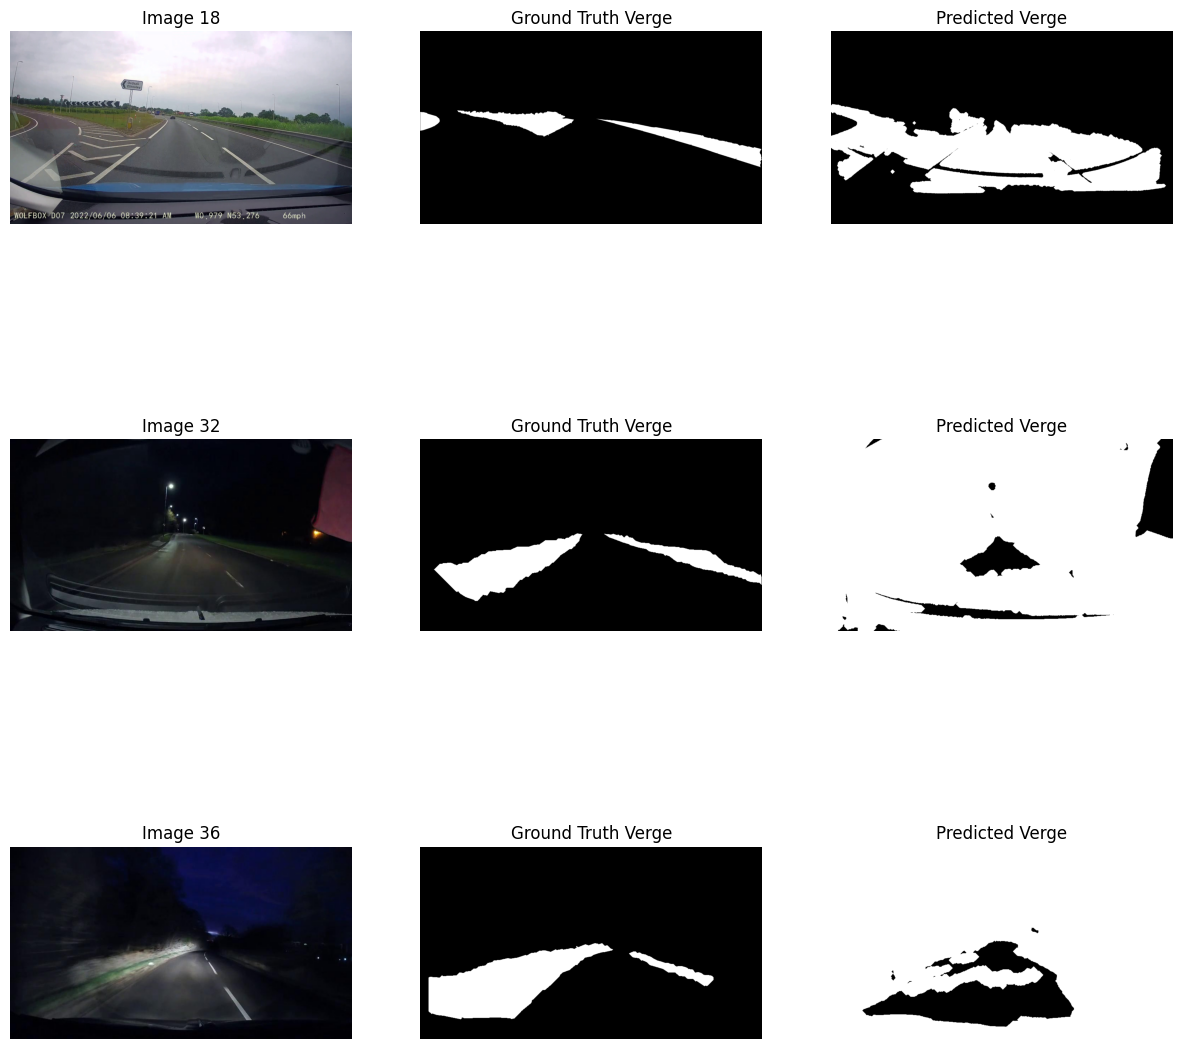

In [93]:
#Show Images where IoU is under 0.1 (worst)
plt.figure(figsize=(15, 15))

x,y = reduce_points(centx,centy)

n_dices = []
indexs = []

#find indexes
for i, u in enumerate(ious):
    if u < 0.1:
        indexs.append(i)

pic_indexer = 1

#Print their ground truth masks and relevant images
for i in range(0,len(indexs)):
    im_p = os.path.join(samples,samp_fs[indexs[i]])
    gt_name = samp_fs[indexs[i]].replace(".jpg",".png")
    gt_p = os.path.join(masks,gt_name)
    
    im = cv2.imread(im_p)
    #format full image

    flooded = flood_point_segment(im,x,y)
    
    #format mask
    gt_mask = cv2.imread(gt_p)
    m = format_gt(gt_mask)
    
    plt.subplot(len(indexs),3,pic_indexer)
    plt.axis('off')
    plt.title(f"Image {indexs[i]}")
    plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
    
    pic_indexer+=1
    
    plt.subplot(len(indexs),3,pic_indexer)
    plt.axis('off')
    plt.title("Ground Truth Verge")
    plt.imshow(m,cmap = "gray")
    
    pic_indexer+=1
    
    plt.subplot(len(indexs),3,pic_indexer)
    plt.axis('off')
    plt.title("Predicted Verge")
    plt.imshow(flooded,cmap = "gray")
    
    pic_indexer+=1

In [ ]:
# #######
# #Mean-Shift
# #######


# #https://stackoverflow.com/questions/62575894/how-to-find-clusters-in-image-using-mean-shift-in-python-opencv

# points = [(centx[j], centy[j]) for j in range(0, len(centx))]

# kmeans = KMeans(n_clusters=3, random_state=0).fit(points)


# kCents = kmeans.cluster_centers_
# #x,y = zip(*kCents)

        
# import numpy as np
# import cv2 as cv
# from sklearn.cluster import MeanShift, estimate_bandwidth


# # filter to reduce noise
# #img = cv.medianBlur(im, 31)


# # flatten the image
# flat_image = im.reshape((-1,3))
# flat_image = np.float32(flat_image)

# print("Flat Done!")

# # meanshift
# # bandwidth = estimate_bandwidth(flat_image, quantile=.06, n_samples=3000)
# bandwidth = estimate_bandwidth(kCents, quantile=1)
# print("Bandwidth Done!")

# ms = MeanShift(bandwidth = bandwidth, max_iter=2, bin_seeding=True)
# ms.fit(flat_image)
# labeled=ms.labels_

# print("Meanshift done!")

# # get number of segments
# segments = np.unique(labeled)
# print('Number of segments: ', segments.shape[0])

# # get the average color of each segment
# total = np.zeros((segments.shape[0], 3), dtype=float)
# count = np.zeros(total.shape, dtype=float)
# for i, label in enumerate(labeled):
#     total[label] = total[label] + flat_image[i]
#     count[label] += 1
# avg = total/count
# avg = np.uint8(avg)

# # cast the labeled image into the corresponding average color
# res = avg[labeled]
# result = res.reshape((im.shape))

# # show the result
# plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
